In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data

In [3]:
start= '2010-01-01'
end = '2019-12-31'

df = data.DataReader('AAPL','yahoo',start,end)
df.head()

AttributeError: 'NoneType' object has no attribute 'group'

In [6]:
!pip install --upgrade pandas_datareader
!pip install --upgrade pandas


In [7]:
pip install yfinance


In [80]:
import yfinance as yf

start = '2015-01-01'
end = '2023-12-31'

# Fetch data using yfinance
df = yf.download('AAPL', start=start, end=end)

# Display the first few rows
print(df.head())


[*********************100%%**********************]  1 of 1 completed

                 Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2015-01-02  27.847500  27.860001  26.837500  27.332500  24.373960  212818400
2015-01-05  27.072500  27.162500  26.352501  26.562500  23.687309  257142000
2015-01-06  26.635000  26.857500  26.157499  26.565001  23.689535  263188400
2015-01-07  26.799999  27.049999  26.674999  26.937500  24.021715  160423600
2015-01-08  27.307501  28.037500  27.174999  27.972500  24.944689  237458000


In [81]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-12-22,195.179993,195.410004,192.970001,193.600006,192.868134,37122800
2023-12-26,193.610001,193.889999,192.830002,193.050003,192.320221,28919300
2023-12-27,192.490005,193.500000,191.089996,193.149994,192.419830,48087700
2023-12-28,194.139999,194.660004,193.169998,193.580002,192.848221,34049900
2023-12-29,193.899994,194.399994,191.729996,192.529999,191.802170,42628800


In [82]:
df=df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-02,27.847500,27.860001,26.837500,27.332500,24.373960,212818400
1,2015-01-05,27.072500,27.162500,26.352501,26.562500,23.687309,257142000
2,2015-01-06,26.635000,26.857500,26.157499,26.565001,23.689535,263188400
3,2015-01-07,26.799999,27.049999,26.674999,26.937500,24.021715,160423600
4,2015-01-08,27.307501,28.037500,27.174999,27.972500,24.944689,237458000


In [83]:
df=df.drop(['Date','Adj Close'],axis=1)
df.head()

,Open,High,Low,Close,Volume
0,27.847500,27.860001,26.837500,27.332500,212818400
1,27.072500,27.162500,26.352501,26.562500,257142000
2,26.635000,26.857500,26.157499,26.565001,263188400
3,26.799999,27.049999,26.674999,26.937500,160423600
4,27.307501,28.037500,27.174999,27.972500,237458000


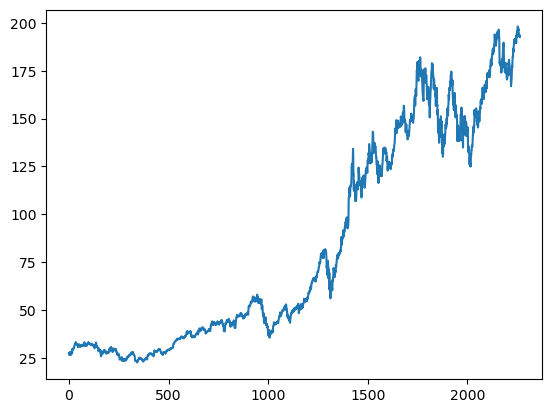

In [84]:
plt.plot(df.Close)

In [85]:
df

,Open,High,Low,Close,Volume
0,27.847500,27.860001,26.837500,27.332500,212818400
1,27.072500,27.162500,26.352501,26.562500,257142000
2,26.635000,26.857500,26.157499,26.565001,263188400
3,26.799999,27.049999,26.674999,26.937500,160423600
4,27.307501,28.037500,27.174999,27.972500,237458000
...,...,...,...,...,...
2259,195.179993,195.410004,192.970001,193.600006,37122800
2260,193.610001,193.889999,192.830002,193.050003,28919300
2261,192.490005,193.500000,191.089996,193.149994,48087700
2262,194.139999,194.660004,193.169998,193.580002,34049900


In [86]:
ma100=df.Close.rolling(100).mean()
ma100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
2259    181.768301
2260    181.787101
2261    181.898701
2262    182.046001
2263    182.173301
Name: Close, Length: 2264, dtype: float64

plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')


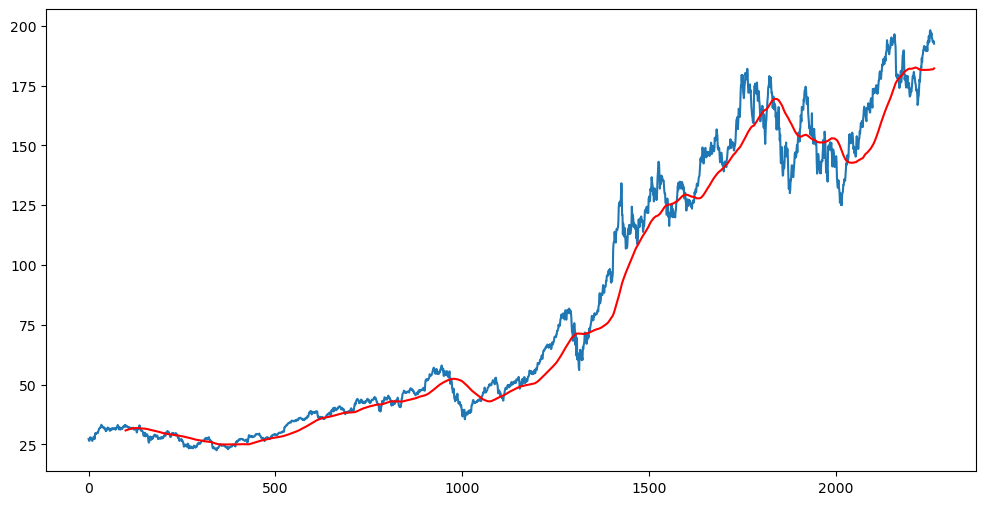

In [87]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')

In [88]:
ma200=df.Close.rolling(200).mean()
ma200

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
2259    178.649100
2260    178.871851
2261    179.085250
2262    179.290201
2263    179.487900
Name: Close, Length: 2264, dtype: float64

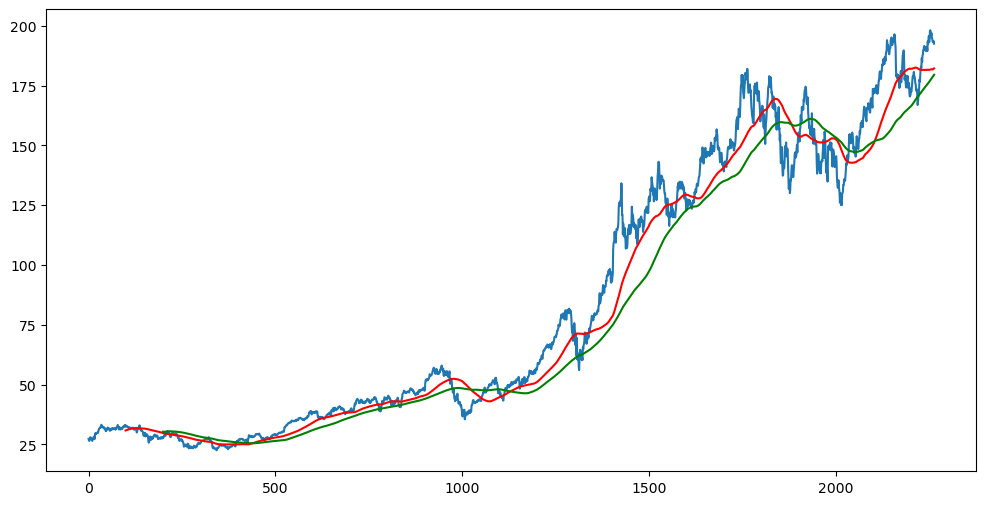

In [89]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [90]:
df.shape

(2264, 5)

In [91]:
# splitting data into training and testing
data_training=pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing=pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

print(data_training.shape)
print(data_testing.shape)


(1584, 1)
(680, 1)


In [92]:
data_training.head()

,Close
0,27.332500
1,26.562500
2,26.565001
3,26.937500
4,27.972500


In [93]:
data_testing.head()

,Close
1584,133.110001
1585,133.500000
1586,131.940002
1587,134.320007
1588,134.720001


In [94]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [95]:
data_training_array=scaler.fit_transform(data_training)
data_training_array

array([[0.03937384],
       [0.03298777],
       [0.03300851],
       ...,
       [0.92817746],
       [0.92535766],
       [0.93099725]])

In [96]:
data_training_array.shape

(1584, 1)

In [97]:
x_train=[]
y_train=[]
for i in range(100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100 :i])
    y_train.append(data_training_array[i,0])

x_train, y_train=np.array(x_train), np.array(y_train)

In [98]:
x_train.shape

(1484, 100, 1)

In [99]:
from keras.layers import Dense,Dropout,LSTM
from keras.models import Sequential

In [100]:
model=Sequential()
model.add(LSTM(units=50, activation = 'relu' , return_sequences=True,
               input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))


model.add(LSTM(units=60, activation = 'relu' , return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation = 'relu' , return_sequences=True))
model.add(Dropout(0.4))


model.add(LSTM(units=120, activation = 'relu' ))
model.add(Dropout(0.5))

model.add(Dense(units=1))



C:\Users\Admin\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [101]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_6 (LSTM)                        │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_7 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_8 (LSTM)                        │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_9 (LSTM)                        │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [102]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train, y_train, epochs=50)

Epoch 1/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 20s 168ms/step - loss: 0.0603
Epoch 2/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 8s 170ms/step - loss: 0.0063
Epoch 3/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 8s 168ms/step - loss: 0.0061
Epoch 4/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 171ms/step - loss: 0.0046
Epoch 5/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 8s 179ms/step - loss: 0.0045
Epoch 6/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 8s 173ms/step - loss: 0.0047
Epoch 7/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 171ms/step - loss: 0.0032
Epoch 8/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 8s 172ms/step - loss: 0.0036
Epoch 9/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 8s 172ms/step - loss: 0.0050
Epoch 10/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 8s 174ms/step - loss: 0.0035
Epoch 11/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 174ms/step - loss: 0.0034
Epoch 12/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 169ms/step - loss: 0.0044
Epoch 13/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 8s 172ms/step - loss: 0.0042
Epoch 14/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 8s 172ms/step - loss: 0.0032
Epoch 15/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 12s 205ms/ste

In [103]:
model.save('keras_model.h5')

In [104]:
data_testing.head()

,Close
1584,133.110001
1585,133.500000
1586,131.940002
1587,134.320007
1588,134.720001


In [105]:
data_training.tail(100)

,Close
1484,113.849998
1485,115.169998
1486,116.029999
1487,116.589996
1488,119.050003
...,...
1579,134.429993
1580,132.029999
1581,134.500000
1582,134.160004


In [106]:
past_100_days=data_training.tail(100)

In [107]:
import pandas as pd
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)

In [108]:
final_df.head()

,Close
0,113.849998
1,115.169998
2,116.029999
3,116.589996
4,119.050003


In [109]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.        ],
       [0.01566579],
       [0.0258723 ],
       [0.03251837],
       [0.0617138 ],
       [0.10526943],
       [0.10954193],
       [0.10788041],
       [0.09969145],
       [0.11749349],
       [0.12497031],
       [0.09411346],
       [0.11144077],
       [0.10159037],
       [0.09411346],
       [0.16650841],
       [0.16567765],
       [0.17624019],
       [0.15202949],
       [0.1706622 ],
       [0.21398061],
       [0.20306204],
       [0.21504869],
       [0.27106579],
       [0.24946589],
       [0.23581773],
       [0.22359368],
       [0.18466657],
       [0.2036553 ],
       [0.15131735],
       [0.20258722],
       [0.21599815],
       [0.17956322],
       [0.17742706],
       [0.20223119],
       [0.17873255],
       [0.15772609],
       [0.16591506],
       [0.21576074],
       [0.27320195],
       [0.29931175],
       [0.34500355],
       [0.34785194],
       [0.33479704],
       [0.27581293],
       [0.21493007],
       [0.24080228],
       [0.250

In [110]:
input_data.shape

(780, 1)

In [111]:
x_test=[]
y_test=[]

for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i,0])

    


In [112]:
x_test,y_test=np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(680, 100, 1)
(680,)


In [113]:
#making predictions
y_predicted=model.predict(x_test)

22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 112ms/step


In [114]:
y_predicted.shape

(680, 1)

In [115]:
y_test

array([0.22857823, 0.23320675, 0.21469266, 0.24293862, 0.24768576,
       0.24376929, 0.23415622, 0.23296934, 0.20899606, 0.22181337,
       0.16615238, 0.16911948, 0.18858304, 0.19416102, 0.15428435,
       0.14312847, 0.10586278, 0.1319725 , 0.16140515, 0.14740088,
       0.1305483 , 0.12864946, 0.15974364, 0.13743178, 0.15725136,
       0.15487779, 0.15428435, 0.13565155, 0.1277    , 0.12378353,
       0.13304057, 0.11500121, 0.14289106, 0.14300976, 0.15297886,
       0.15760739, 0.14550204, 0.16021837, 0.19736526, 0.18739616,
       0.19344879, 0.21291235, 0.19712803, 0.21896516, 0.23890336,
       0.23558032, 0.23213867, 0.22857823, 0.24839781, 0.26679329,
       0.27427021, 0.27794927, 0.30987429, 0.3343224 , 0.3645859 ,
       0.3488014 , 0.37099456, 0.36375505, 0.3772846 , 0.41894131,
       0.41098975, 0.38618562, 0.33942556, 0.38333723, 0.3744362 ,
       0.39105155, 0.41193921, 0.41704256, 0.39069553, 0.36945166,
       0.3772846 , 0.37989558, 0.37586049, 0.39769762, 0.39283

In [116]:
y_predicted

array([[0.16079026],
       [0.1646664 ],
       [0.1689104 ],
       [0.17391305],
       [0.17983209],
       [0.18649854],
       [0.193579  ],
       [0.20049113],
       [0.20646374],
       [0.21079434],
       [0.21325412],
       [0.21350543],
       [0.21155947],
       [0.20784162],
       [0.20311058],
       [0.19806774],
       [0.19310848],
       [0.18846042],
       [0.18422407],
       [0.18044305],
       [0.1772101 ],
       [0.17441659],
       [0.17177685],
       [0.16937946],
       [0.16728993],
       [0.16555421],
       [0.16421294],
       [0.16325995],
       [0.16262345],
       [0.16218594],
       [0.16182746],
       [0.16148071],
       [0.16107005],
       [0.16061564],
       [0.16016649],
       [0.15979977],
       [0.15959428],
       [0.15956247],
       [0.1597305 ],
       [0.16022281],
       [0.16109966],
       [0.16235647],
       [0.16393381],
       [0.1656179 ],
       [0.16741489],
       [0.16954967],
       [0.17209166],
       [0.175

In [117]:
scaler.scale_

array([0.01186803])

In [118]:
scale_factor=1/0.02123255
y_predicted=y_predicted*scale_factor
y_test=y_test*scale_factor

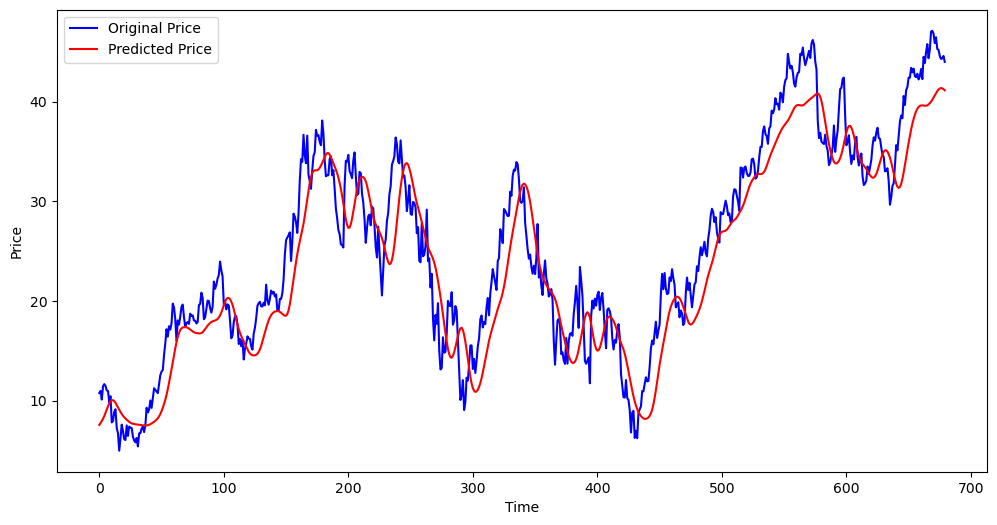

In [119]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label='Original Price')
plt.plot(y_predicted, 'r',label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()